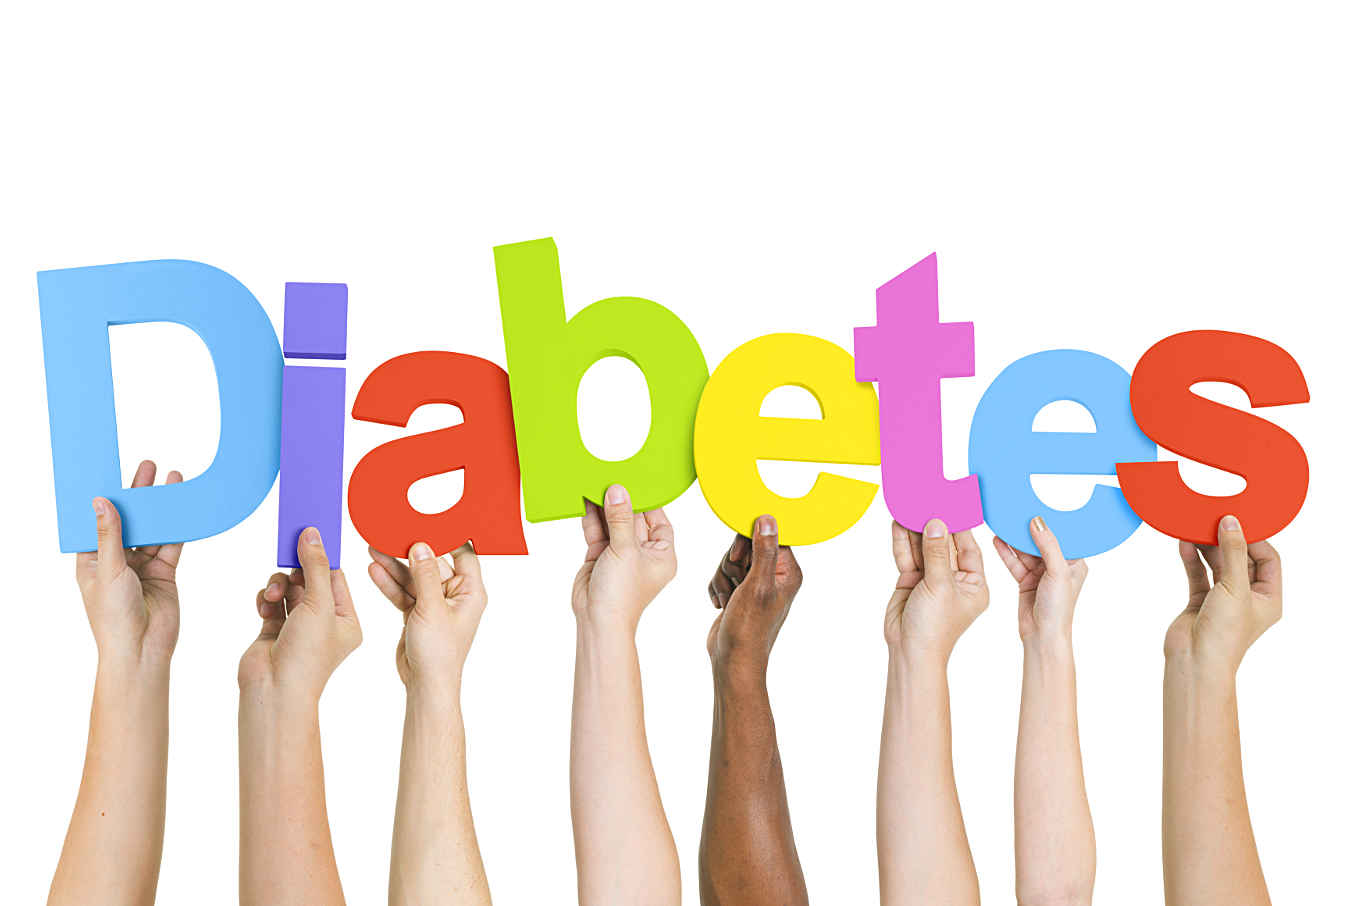

# **Diabetes Dataset: Comparative Analysis of Logistic Regression and Random Forest Models**

**👨‍💻Author: Muhammad Hassaan**

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/iammuhammadhassaaan) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)


## **Metadata**

This dataset is originally from the `National Institute of Diabetes and Digestive and Kidney Diseases.` The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. 

In particular, all patients here are females at least 21 years old of Pima Indian heritage.2 From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).

### Feature Summary

| **Feature Name**        | **Description**                                                | **Type**   | **Range/Values**           |
|-------------------------|---------------------------------------------------------------|------------|----------------------------|
| **Pregnancies**          | Number of pregnancies                                         | Numerical  | 0 - 17                     |
| **Glucose**              | Plasma glucose concentration a 2 hours in an oral glucose test | Numerical  | 0 - 199                    |
| **BloodPressure**        | Diastolic blood pressure (mm Hg)                              | Numerical  | 0 - 122                    |
| **SkinThickness**        | Triceps skinfold thickness (mm)                               | Numerical  | 0 - 99                     |
| **Insulin**              | 2-Hour serum insulin (mu U/ml)                                | Numerical  | 0 - 846                    |
| **BMI**                  | Body Mass Index (weight in kg/(height in m)^2)                | Numerical  | 0 - 67.1                   |
| **DiabetesPedigree**     | Diabetes pedigree function (family history)                   | Numerical  | 0.078 - 2.42               |
| **Age**                  | Age in years                                                  | Numerical  | 21 - 81                    |
| **Outcome**              | Class variable (0 or 1 indicating the presence of diabetes)   | Categorical| 0 = No, 1 = Yes            |

### Additional Information

- **Target Variable**: `Outcome` (1 indicates the presence of diabetes, 0 indicates no diabetes)
- **Total Records**: 768 rows
- **Total Features**: 9 features (8 predictive features, 1 target variable)
- **Missing Values**: Certain features like `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` may contain zeros, which could indicate missing values.
  

## Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
from scipy.stats import chi2
import statsmodels.api as sm

# import sklearn modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

# for saving models
import joblib
import pickle

# set options for better readibility 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import and Load the Data

In [2]:
# import the data
df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

In [3]:
# show head of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# show the tail of the data
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Exploratory Data Analysis (EDA)

### Step 1: Basic Exploration

In [5]:
# check the shape of the data
df.shape

(768, 9)

In [6]:
# check info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# check summary statistics of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# correlation of dataset
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
# check the datatypes of the data
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
# check null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# check quantile
df.quantile([0, 0.05, 0.25, 0.50, 0.75, 0.99, 1]).T

,0.00,0.05,0.25,0.50,0.75,0.99,1.00
Pregnancies,0.000,0.00000,1.00000,3.0000,6.00000,13.00000,17.00
Glucose,0.000,79.00000,99.00000,117.0000,140.25000,196.00000,199.00
BloodPressure,0.000,38.70000,62.00000,72.0000,80.00000,106.00000,122.00
SkinThickness,0.000,0.00000,0.00000,23.0000,32.00000,51.33000,99.00
Insulin,0.000,0.00000,0.00000,30.5000,127.25000,519.90000,846.00
BMI,0.000,21.80000,27.30000,32.0000,36.60000,50.75900,67.10
DiabetesPedigreeFunction,0.078,0.14035,0.24375,0.3725,0.62625,1.69833,2.42
Age,21.000,21.00000,24.00000,29.0000,41.00000,67.00000,81.00
Outcome,0.000,0.00000,0.00000,0.0000,1.00000,1.00000,1.00


### Step 2: Checking Outliers

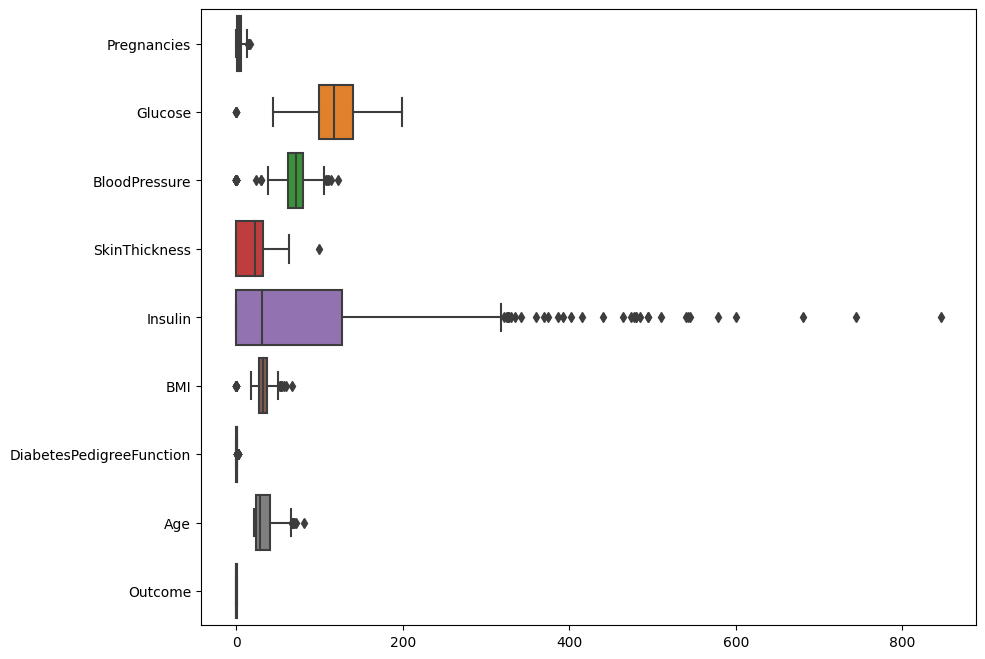

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(data=df, orient="h")

In [13]:
# List of numerical columns where outliers are expected
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

In [14]:
import nbformat
print(nbformat.__version__)

5.10.4


In [15]:
# plotting outliers using boxplot in plotly
for col in numerical_columns:
    fig = px.box(df, y=col, title=f'Boxplot of {col}', points='outliers')
    fig.show()

In [16]:
# plotting outliers using violinplot in plotly
for col in numerical_columns:
    fig = px.violin(df, y=col, title=f'Violinplot of {col}', points='outliers', box=True)
    fig.show()

In [17]:
# z-score method to flag outliers
from scipy import stats

# Calculating Z-scores for each feature
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Setting a threshold for outliers, typically Z > 3
outliers = np.where(z_scores > 3)

# Displaying rows with outliers
outlier_rows = df.iloc[outliers[0]]
print("Outliers detected:\n", outlier_rows)

Outliers detected:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
13             1      189             60             23      846  30.1   
15             7      100              0              0        0  30.0   
49             7      105              0              0        0   0.0   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
60             2       84              0              0        0   0.0   
75             1        0             48             20        0  24.7   
78             0      131              0              0        0  43.2   
81             2       74              0              0        0   0.0   
81             2  

### Step 3: Feature Distribution Analysis

In [18]:
# 1. plotting histograms using plotly to analyze the distribution of each feature
for col in numerical_columns:
    fig = px.histogram(df, x=col, nbins=30, title=f'Histogram of {col}',
    marginal='box', labels={col:col}, color_discrete_sequence=['#636EFA'])
    fig.show()

In [19]:
# 2. KDE (Kernel Density Estimation) plots using plotly
for col in numerical_columns:
    fig = px.histogram(df, x=col,
    marginal='box', labels={col:col}, 
    color_discrete_sequence=['#636EFA'],
    histnorm='density')

    # update layout for x and y axis labels
    fig.update_layout(
        xaxis_title=col,
        yaxis_title='Density'
    )

    fig.show()

In [20]:
# 3. Checking for Skewness and Transformation needs
skewness = df[numerical_columns].skew()
print("Skewness of numerical features:\n,", skewness)

Skewness of numerical features:
, Pregnancies      0.901674
Glucose          0.173754
BloodPressure   -1.843608
SkinThickness    0.109372
Insulin          2.272251
BMI             -0.428982
Age              1.129597
dtype: float64


In [21]:
# 4. log transformation of highly skewed features
np.log1p(df['Insulin'])

0      0.000000
1      0.000000
2      0.000000
3      4.553877
4      5.129899
5      0.000000
6      4.488636
7      0.000000
8      6.298949
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     6.741701
14     5.170484
15     0.000000
16     5.442418
17     0.000000
18     4.430817
19     4.574711
20     5.463832
21     0.000000
22     0.000000
23     0.000000
24     4.990433
25     4.753590
26     0.000000
27     4.948760
28     4.709530
29     0.000000
30     0.000000
31     5.505332
32     4.007333
33     0.000000
34     0.000000
35     5.262690
36     0.000000
37     0.000000
38     0.000000
39     5.337538
40     4.262680
41     0.000000
42     0.000000
43     5.484797
44     0.000000
45     0.000000
46     0.000000
47     0.000000
48     0.000000
49     0.000000
50     4.418841
51     3.610918
52     3.178054
53     5.707110
54     5.837730
55     0.000000
56     5.720312
57     4.709530
58     0.000000
59     4.962845
60     0.000000
61     0.000000
62     0

### Step 4: Correlation Analysis

In [22]:
# 1. correlation matrix using pandas
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [23]:
# 2. Visualizing the correlation matrix using plotly heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.index,
        y=corr.columns,
        colorscale='Viridis'
    ))

fig.update_layout(title='Correlation Heatmap of Numerical Features',
                  xaxis_nticks=36)
fig.show()

In [ ]:
# 3. Paiplot to visualize pairwise relationship between features (using Seaborn)
sns.pairplot(df, hue='Outcome', diag_kind='kde', palette='coolwarm')
plt.show()

In [ ]:
# Assuming df is your DataFrame containing the Diabetes Dataset

# List of numerical columns for pairwise plotting
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Creating a subplot layout for pairwise scatter plots
fig = make_subplots(rows=len(numerical_columns), cols=len(numerical_columns),
                    shared_xaxes=True, shared_yaxes=True,
                    vertical_spacing=0.02, horizontal_spacing=0.02)

# Plot pairwise scatter plots
for i, row_feature in enumerate(numerical_columns):
    for j, col_feature in enumerate(numerical_columns):
        if i == j:  # If same feature, plot a histogram
            fig.add_trace(go.Histogram(x=df[col_feature], nbinsx=20, showlegend=False),
                          row=i+1, col=j+1)
        else:  # Plot scatter plots for different feature combinations
            fig.add_trace(go.Scatter(x=df[col_feature], y=df[row_feature],
                                     mode='markers', marker=dict(color=df['Outcome'], colorscale='Viridis', size=5),
                                     showlegend=False),
                          row=i+1, col=j+1)

# Update layout for better visibility
fig.update_layout(height=1200, width=1200, title_text="Pairwise Scatter Plots with Diagonal Histograms",
                  showlegend=False)

# Show the plot
fig.show()

In [ ]:
# 4. Identifying highly correlated features (for potential multicollinearity)
# Consider correlation above 0.7 as high
high_correlation_pairs = corr[corr > 0.7]
print("Highly correlated features:\n", high_correlation_pairs)

In [ ]:
# Use a mask for the upper triangle to show half of the heatmap for clarity
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting Seaborn heatmap with mask
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Step 5: Diabetes Outcome Distribution

In [ ]:
# 1. Checking the distribution of the target variable
outcome_counts = df['Outcome'].value_counts()

In [ ]:
# 2. Visualization outcome distribution with plotly
fig = px.bar(outcome_counts,
            x=outcome_counts.index,
            y=outcome_counts.values,
            color=outcome_counts.index,
            text=outcome_counts.values,
            color_continuous_scale=px.colors.sequential.Viridis,
            labels={'x': 'Diabetes Outcome (0 = No, 1 = Yes)', 'y': 'Count'},
            title='Distribution of Diabetes Outcome')

fig.update_layout(xaxis_title='Outcome (0 = No Diabetes, 1 = Diabetes)',
                  yaxis_title='Number of Patients',
                  showlegend=False)
                  
fig.show()  

In [ ]:
# 3. Percentage of each class in the target variable
outcome_percentage = outcome_counts / len(df) * 100
print(f"Percentage of each Outcome class:\n{outcome_percentage}")

### Step 6: Glucose vs Outcome

In [ ]:
# visualizing glucose levels againts outcome using a box plot in plotly 
fig = px.box(df, x='Outcome', y='Glucose', color='Outcome',
                labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'Glucose': 'Glucose Level'},
                title='Glucose Levels Against Diabetes Outcome')

fig.show()

In [ ]:
# Glucose levels against outcome using a violin plot
fig = px.violin(df, x='Outcome', y='Glucose', color='Outcome',
                labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'Glucose': 'Glucose Level'},
                title='Glucose Levels Against Diabetes Outcome',
                box=True,)

fig.show()

In [ ]:
# distribution of Glucose levels with a histogram
fig = px.histogram(df, x='Glucose', nbins=30, title='Distribution of Glucose Levels', color='Outcome',
                    marginal='box', labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'Glucose': 'Glucose Level'},
                    color_discrete_sequence=['#636EFA'], barmode='overlay')

fig.update_layout(barmode='overlay', xaxis_title='Glucose Level', yaxis_title='Count')

fig.show()

### Step 7: Age vs Outcome

In [ ]:
# 1. Visualizing age against outcome using a box plot in plotly
fig = px.box(df, x='Outcome', y='Age', color='Outcome',
                labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'Age': 'Age'},
                title='Age Against Diabetes Outcome',
                color_discrete_sequence=['red', 'blue', 'green'])

fig.show()

In [ ]:
# 2. Visualizing Age against Outcome using a violin plot
fig = px.violin(df, x='Outcome', y='Age',
                            labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'Age': 'Age (Years)'},
                            title='Violin Plot of Age by Diabetes Outcome',
                            color='Outcome',
                            color_discrete_sequence=['red', 'blue', 'green'])
fig.show()

In [ ]:
# 3. Visualizing the distribution of Age with a histogram
fig = px.histogram(df, x='Age', color='Outcome',
                             labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'Age': 'Age (Years)'},
                             title='Histogram of Age by Diabetes Outcome',
                             barmode='overlay')

fig.update_layout(barmode='overlay', xaxis_title='Age (Years)', yaxis_title='Count')
fig.show()

### Step 8: BMI vs Outcome

In [ ]:
# 1. BMI agianst outcome using a box plot in plotly
fig = px.box(df, x='Outcome', y='BMI', color='Outcome',
                color_discrete_sequence=['#636EFA', '#EF553B'],
                labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'BMI': 'Body Mass Index'},
                title='Body Mass Index Against Diabetes Outcome')

fig.show()

In [ ]:
# 2. Visualizing BMI against Outcome using a violin plot
fig = px.violin(df, x='Outcome', y='BMI',
                            labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'BMI': 'Body Mass Index (BMI)'},
                            title='Violin Plot of BMI by Diabetes Outcome',
                            color='Outcome', 
                            color_discrete_sequence=['#636EFA', '#EF553B'])  # Custom colors for the classes

fig.show()

In [ ]:
# 3. Visualizing the distribution of BMI with a histogram
fig = px.histogram(df, x='BMI', color='Outcome',
                             labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'BMI': 'Body Mass Index (BMI)'},
                             title='Histogram of BMI by Diabetes Outcome',
                             barmode='overlay', 
                             color_discrete_sequence=['#636EFA', '#EF553B'])  # Custom colors for the classes

fig.update_layout(barmode='overlay', xaxis_title='Body Mass Index (BMI)', yaxis_title='Count')
fig.show()

In [ ]:
# Create bins for BMI
binned_bmi = pd.cut(df['BMI'], bins=np.arange(10, 60, 5))  # Adjust bins as needed
heatmap_data = df.groupby(['Outcome', binned_bmi]).size().unstack(fill_value=0)

# 2. Heatmap of BMI vs Outcome
fig_heatmap = px.imshow(heatmap_data,
                         labels=dict(x='BMI Range', y='Diabetes Outcome (0 = No, 1 = Yes)', color='Count'),
                         title='Heatmap of BMI Ranges vs Diabetes Outcome',
                         x=heatmap_data.columns.astype(str),  # Convert bins to string for better labeling
                         y=heatmap_data.index,
                         color_continuous_scale=px.colors.sequential.Viridis)

fig_heatmap.show()

### Step 9: Insulin vs Outcome

In [ ]:
# 1. Box Plot of Insulin by Outcome
fig = px.box(df, x='Outcome', y='Insulin',
                          labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'Insulin': 'Insulin Levels'},
                          title='Insulin Distribution by Diabetes Outcome',
                          color='Outcome', 
                          color_discrete_sequence=['#636EFA', '#EF553B'])  # Custom colors for the classes

fig.show()

In [ ]:
# 2. Histogram of Insulin by Outcome
fig = px.histogram(df, x='Insulin', color='Outcome',
                                 labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'Insulin': 'Insulin Levels'},
                                 title='Histogram of Insulin by Diabetes Outcome',
                                 barmode='overlay', 
                                 color_discrete_sequence=['#636EFA', '#EF553B'])  # Custom colors for the classes

fig.update_layout(barmode='overlay', xaxis_title='Insulin Levels', yaxis_title='Count')
fig.show()


In [ ]:
# 3. Violin Plot of Insulin by Outcome
fig = px.violin(df, x='Outcome', y='Insulin',
                                labels={'Outcome': 'Diabetes Outcome (0 = No, 1 = Yes)', 'Insulin': 'Insulin Levels'},
                                title='Violin Plot of Insulin by Diabetes Outcome',
                                color='Outcome', 
                                color_discrete_sequence=['#636EFA', '#EF553B'])  # Custom colors for the classes

fig.show()


### Step 10: Pairwise Relationships

In [ ]:
# Selecting features for pairwise relationships
features = ['BMI', 'Glucose', 'Insulin', 'Age', 'Outcome']
pairwise_df = df[features]

# Creating a subplot grid for pairwise relationships
fig = sp.make_subplots(rows=len(features)-1, cols=len(features)-1,
                        subplot_titles=[f'{x} vs {y}' for i, x in enumerate(features[:-1]) for y in features[:-1] if x != y],
                        vertical_spacing=0.1)

# Add scatter plots for each pair of features
for i, x in enumerate(features[:-1]):
    for j, y in enumerate(features[:-1]):
        if x != y:
            scatter = px.scatter(pairwise_df, x=x, y=y, color='Outcome',
                                 color_discrete_sequence=['#636EFA', '#EF553B']).data[0]
            fig.add_trace(scatter, row=i+1, col=j+1)

# Update layout
fig.update_layout(title='Pairwise Relationships of Selected Features',
                  height=1000, width=1000,
                  showlegend=False)

fig.show()

### Step 11: Feature Importance (Machine Learning)


#### 1. Feature Importance Calculation

In [ ]:
# selecting features and target
X = df.drop(columns='Outcome')
y = df['Outcome']

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# build a random forest classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, y_train)

In [ ]:
# calculate feature importance
feature_importance = rfc.feature_importances_
features = X.columns

In [ ]:
# create a dataframe for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Display the feature importances
importance_df

#### 2. Visualizing Feature Importance

In [ ]:
# 1. Bar Plot of Feature Importance
fig_feature_importance = px.bar(importance_df, x='Feature', y='Importance',
                                 labels={'Feature': 'Features', 'Importance': 'Importance Score'},
                                 title='Feature Importance in Predicting Diabetes Outcome',
                                 color='Importance',
                                 color_continuous_scale=px.colors.sequential.Viridis)

# Display the plot
fig_feature_importance.show()

### Step 12: Multivariate Outliers

#### 1. Calculating Mahalanobis Distance

In [ ]:
# function to compute Mahalanobis distance
def mahalanobis(X):
    mean = np.mean(X, axis=0)
    cov = np.cov(X, rowvar=False)
    inv_cov_matrix = np.linalg.inv(cov)

    left_term = np.dot((X - mean), inv_cov_matrix)
    mahal = np.dot(left_term, (X - mean).T)
    return np.sqrt(mahal.diagonal())


# calculate Mahalanobis distance for entire dataset
X_features = df.drop(columns='Outcome')
mahalanobis_distances = mahalanobis(X_features)

# set a threshold based on chi-squared distribution for multivariate outliers
threshold = chi2.ppf(0.975, X_features.shape[1])

# identify points that exceed the threshold as outliers
df['Outlier'] = mahalanobis_distances > threshold

# display outliers count
df["Outlier"].value_counts()

#### 2. Visualizing Multivariate Outliers

In [ ]:
# Scatter Plot Matrix with Outlier Status
fig_scatter_outliers = px.scatter_matrix(df, dimensions=['Glucose', 'Insulin', 'BMI', 'Age'],
                                          color='Outlier',
                                          labels={'Outlier': 'Outlier Status (0 = Inlier, 1 = Outlier)'},
                                          title='Scatter Matrix with Multivariate Outlier Detection',
                                          color_discrete_sequence=['#636EFA', '#EF553B'])

# Update plot layout
fig_scatter_outliers.update_traces(marker=dict(size=4))

# Display the plot
fig_scatter_outliers.show()


#### 3. Outliers in Specific Feature Relationships

In [ ]:
# Glucose vs Insulin (highlighting outliers)
fig_glucose_insulin_outliers = px.scatter(df, x='Glucose', y='Insulin', color='Outlier',
                                           labels={'Outlier': 'Outlier Status (0 = Inlier, 1 = Outlier)'},
                                           title='Glucose vs Insulin (Outliers Highlighted)',
                                           color_discrete_sequence=['#636EFA', '#EF553B'])

fig_glucose_insulin_outliers.show()

# BMI vs Age (highlighting outliers)
fig_bmi_age_outliers = px.scatter(df, x='BMI', y='Age', color='Outlier',
                                   labels={'Outlier': 'Outlier Status (0 = Inlier, 1 = Outlier)'},
                                   title='BMI vs Age (Outliers Highlighted)',
                                   color_discrete_sequence=['#636EFA', '#EF553B'])

fig_bmi_age_outliers.show()

In [ ]:
df['Outlier'].value_counts()

In [ ]:
# remove "Outlier" column from the dataset
df = df.drop(columns='Outlier')

In [ ]:
df.head()

### Step 13: Age Group Analysis

#### 1. Grouping Patients by Age

In [ ]:
# Define age bins and labels for age groups
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Create a new column 'AgeGroup' by binning the 'Age' column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the count of diabetes occurrences (Outcome = 1) for each age group
age_group_counts = df.groupby('AgeGroup')['Outcome'].value_counts().unstack().fillna(0)
age_group_counts.columns = ['No Diabetes', 'Diabetes']

# Display the data
age_group_counts

#### 2. Visualizing Age Group Analysis with a Bar Plot

In [ ]:
# Bar plot to visualize diabetes occurrence by age group
fig_age_group = go.Figure()

# Add bars for 'No Diabetes'
fig_age_group.add_trace(go.Bar(
    x=age_group_counts.index,
    y=age_group_counts['No Diabetes'],
    name='No Diabetes',
    marker_color='#636EFA'
))

# Add bars for 'Diabetes'
fig_age_group.add_trace(go.Bar(
    x=age_group_counts.index,
    y=age_group_counts['Diabetes'],
    name='Diabetes',
    marker_color='#EF553B'
))

# Update layout for the grouped bar chart
fig_age_group.update_layout(
    title='Diabetes Occurrence Across Age Groups',
    xaxis_title='Age Group',
    yaxis_title='Count',
    barmode='group',
    legend_title='Outcome',
    xaxis=dict(tickmode='linear')
)

# Display the plot
fig_age_group.show()

### Step 14: BMI vs Insulin Relationship

#### 1. Scatter Plot with Regression Line

In [ ]:
# Scatter plot of BMI vs Insulin
fig_bmi_insulin = px.scatter(df, x='BMI', y='Insulin',
                             labels={'BMI': 'Body Mass Index (BMI)', 'Insulin': 'Insulin Levels'},
                             title='BMI vs Insulin Relationship',
                             trendline="ols",  # Adding the regression line
                             color_discrete_sequence=['#636EFA'])

# Display the plot
fig_bmi_insulin.update_layout(
    xaxis_title='BMI',
    yaxis_title='Insulin Levels',
    showlegend=False
)

fig_bmi_insulin.show()                         

### Step 15: Distribution by Pregnancy Count

#### 1. Bar Plot for Pregnancy Count Distribution

In [ ]:
# Group data by the number of pregnancies and calculate the diabetes occurrence
pregnancy_diabetes_counts = df.groupby('Pregnancies')['Outcome'].value_counts().unstack().fillna(0)
pregnancy_diabetes_counts.columns = ['No Diabetes', 'Diabetes']

# Bar plot to visualize the effect of pregnancy count on diabetes occurrence
import plotly.graph_objects as go

fig_pregnancy = go.Figure()

# Add bars for 'No Diabetes'
fig_pregnancy.add_trace(go.Bar(
    x=pregnancy_diabetes_counts.index,
    y=pregnancy_diabetes_counts['No Diabetes'],
    name='No Diabetes',
    marker_color='#636EFA'
))

# Add bars for 'Diabetes'
fig_pregnancy.add_trace(go.Bar(
    x=pregnancy_diabetes_counts.index,
    y=pregnancy_diabetes_counts['Diabetes'],
    name='Diabetes',
    marker_color='#EF553B'
))

# Update layout
fig_pregnancy.update_layout(
    title='Diabetes Risk Based on Pregnancy Count',
    xaxis_title='Number of Pregnancies',
    yaxis_title='Count',
    barmode='group',
    legend_title='Outcome'
)

# Display the plot
fig_pregnancy.show()

#### 2. Scatter Plot for Pregnancy Count vs Diabetes Risk

In [ ]:
# Scatter plot to show pregnancy count vs diabetes risk
fig_pregnancy_scatter = px.scatter(df, x='Pregnancies', y='Outcome',
                                   labels={'Pregnancies': 'Pregnancy Count', 'Outcome': 'Diabetes (1 = Yes, 0 = No)'},
                                   title='Pregnancy Count vs Diabetes Risk',
                                   color='Outcome',
                                   color_discrete_sequence=['#636EFA', '#EF553B'],
                                   trendline='ols')

# Display the plot
fig_pregnancy_scatter.update_layout(
    xaxis_title='Pregnancy Count',
    yaxis_title='Diabetes Outcome',
    legend_title='Outcome'
)

fig_pregnancy_scatter.show()

## Feature Engineering

We will create two new features:

* BMI Categories: Classifying BMI into categories like underweight, normal, overweight, and obese.
* Age Groups: Segmenting patients into age groups for better analysis of age-based trends.

1. Creating BMI Categories
The BMI ranges are often classified into:

* Underweight: BMI < 18.5
* Normal weight: 18.5 <= BMI < 25
* Overweight: 25 <= BMI < 30
* Obese: BMI >= 30

2. Creating Age Groups
We can categorize the Age column into groups, such as:

* Youth: Age < 30
* Middle-aged: 30 <= Age < 50
* Senior: Age >= 50

3. Check Feature Distributions
Let’s check how these new features are distributed within the dataset.

#### 1. Creating BMI Categories

In [ ]:
# define BMI categories 
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 100] # ranges for BMI categories
labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obesity Class I', 'Obesity Class II', 'Obesity Class III'] # labels for BMI categories

In [ ]:
# create a new column "BMI_Category" using pd.cut
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# display the first few rows of the dataframe
df.head()

#### 2. Creating Age Groups

In [ ]:
# Define Age groups
age_bins = [0, 30, 50, np.inf]
age_labels = ['Youth', 'Middle-aged', 'Senior']

# Create a new column 'Age_Group' using pd.cut
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Display the first few rows with the new column
df[['Age', 'Age_Group']].head()

### 3. Check Feature Distributions

In [ ]:
# Count plot for BMI categories
bmi_category_counts = df['BMI_Category'].value_counts()

# Bar plot for BMI Categories
import plotly.express as px

fig_bmi_cat = px.bar(bmi_category_counts, x=bmi_category_counts.index, y=bmi_category_counts.values,
                     labels={'x': 'BMI Category', 'y': 'Count'},
                     title='Distribution of BMI Categories',
                     color_discrete_sequence=['#636EFA'])

fig_bmi_cat.show()

# Count plot for Age groups
age_group_counts = df['Age_Group'].value_counts()

# Bar plot for Age Groups
fig_age_group = px.bar(age_group_counts, x=age_group_counts.index, y=age_group_counts.values,
                       labels={'x': 'Age Group', 'y': 'Count'},
                       title='Distribution of Age Groups',
                       color_discrete_sequence=['#EF553B'])

fig_age_group.show()

In [ ]:
df.head()

In [ ]:
# drop "AgeGroup" column form the dataset
df = df.drop(columns='AgeGroup')

In [ ]:
df.head()

## Encoding Categorical Data

In [ ]:
# initilize the encoder
encoder = OneHotEncoder(drop='first')

In [ ]:
# Select the categorical columns
categorical_cols = ['BMI_Category', 'Age_Group']

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(df[categorical_cols])

# Check the shape of the transformed features
print(f"Shape of encoded features: {encoded_features.shape}")

In [ ]:
# Ensure the number of columns generated matches the number of new encoded categories
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
# Reset index to match the original dataframe and concatenate with the original dataframe
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_cols, axis=1)

# Display the updated dataframe
df_encoded.head()

## Feature Scaling

We will first apply the StandardScaler and MinMaxScaler to compare the results.

In [ ]:
# Select the columns to scale (typically, we exclude the target variable and encoded categorical features)
features_to_scale = df_encoded.drop(columns=['Outcome']).columns

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply StandardScaler
scaled_standard = scaler_standard.fit_transform(df_encoded[features_to_scale])

# Apply MinMaxScaler
scaled_minmax = scaler_minmax.fit_transform(df_encoded[features_to_scale])

# Create DataFrames from the scaled features
scaled_standard_df = pd.DataFrame(scaled_standard, columns=features_to_scale)
scaled_minmax_df = pd.DataFrame(scaled_minmax, columns=features_to_scale)

# Add the target variable 'Outcome' back into the scaled DataFrames
scaled_standard_df['Outcome'] = df_encoded['Outcome'].values
scaled_minmax_df['Outcome'] = df_encoded['Outcome'].values

In [ ]:
# Display the scaled data (Standard Scaler)
scaled_standard_df.head()

In [ ]:
# Display the scaled data (MinMax Scaler)
scaled_minmax_df.head()

We are using Standard scaler because this is best for datasets that are normally distributes.

## Splitting the Data

In [ ]:
# Assume 'scaled_standard_df' is your scaled DataFrame
# Using scaled_standard_df

# Define features and target variable
X = scaled_standard_df.drop(columns=['Outcome'])
y = scaled_standard_df['Outcome']

# Split the dataset into training and testing sets
# Test size is typically 20-30% of the total dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the splits
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

## Model Selection

In [ ]:
# define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [ ]:
# evaluate models using cross validation score
# function to evaluate models
def evaluate_model(model, X_train, y_train):
    results = {}
    for model_name, model in models.items():
        # perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        results[model_name] = {
            "Mean Accuracy": scores.mean(),
            "Standard Deviation": scores.std()
        }
    return results

# evaluate the defined models
model_results = evaluate_model(models, X_train, y_train)

# print the results
for model_name, result in model_results.items():
    print(f"{model_name}: Mean Accuracy = {result['Mean Accuracy']:.3f}, Standard Deviation = {result['Standard Deviation']:.3f}")

## Model Training

In [ ]:
# Function to train models and evaluate their performance on the test set
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Print results
        print(f"{model_name} - Test Accuracy: {accuracy:.4f}")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print("\n" + "="*60 + "\n")

# Train and evaluate the models
train_and_evaluate_models(models, X_train, y_train, X_test, y_test)

## Hyperparameter Tuning

### 1. Logistic Regression

In [ ]:
# Define the model
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)

# Define the hyperparameter grid
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Set up the GridSearchCV
grid_search_log_reg = GridSearchCV(estimator=log_reg_model, param_grid=param_grid_log_reg,
                                    cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search_log_reg.fit(X_train, y_train)

# Get the best model
best_log_reg_model = grid_search_log_reg.best_estimator_

# Print best hyperparameters
print("Best Hyperparameters for Logistic Regression:")
print(grid_search_log_reg.best_params_)

### 2. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Print best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)


## Fit The Models

### Step 1: Fit the Logistic Regression Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Update the best hyperparameters to use 'l2' penalty
best_log_reg_params = {'C': 0.1, 'penalty': 'l2'}

# Initialize the Logistic Regression model with the best parameters
best_log_reg_model = LogisticRegression(**best_log_reg_params, max_iter=1000)

# Fit the model on the training data
best_log_reg_model.fit(X_train, y_train)

# Predict on the test set
log_reg_y_pred = best_log_reg_model.predict(X_test)

# Calculate metrics for evaluation
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
log_reg_f1 = f1_score(y_test, log_reg_y_pred)
log_reg_roc_auc = roc_auc_score(y_test, best_log_reg_model.predict_proba(X_test)[:, 1])

print("Logistic Regression Metrics after Hyperparameter Tuning:")
print(f"Accuracy: {log_reg_accuracy:.4f}, F1 Score: {log_reg_f1:.4f}, ROC AUC: {log_reg_roc_auc:.4f}")

### Step 2: Fit the Random Forest Model

In [ ]:
# Best hyperparameters for Random Forest from tuning
best_rf_params = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'n_estimators': 50
}

# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = best_rf_model.predict(X_test)

# Calculate metrics for evaluation
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

print("Random Forest Metrics after Hyperparameter Tuning:")
print(f"Accuracy: {rf_accuracy:.4f}, F1 Score: {rf_f1:.4f}, ROC AUC: {rf_roc_auc:.4f}")

## Model Evaluation

### 1. Evaluate Logistic Regression Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
log_reg_y_pred = best_log_reg_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, log_reg_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, log_reg_y_pred)
print("Classification Report for Logistic Regression:\n", class_report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_log_reg_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print the AUC score
print(f'Area Under the Curve (AUC): {roc_auc:.4f}')

### 2. Evaluate Random Forest Model

In [ ]:
# Predict on the test set
rf_y_pred = best_rf_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_test, rf_y_pred)
print("Classification Report for Logistic Regression:\n", class_report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_log_reg_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print the AUC score
print(f'Area Under the Curve (AUC): {roc_auc:.4f}')

## Model Interpretation

### 1. Logistic Regression Coefficients

In [ ]:
# Get the feature names
feature_names = X_train.columns

# Create a DataFrame for coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_log_reg_model.coef_[0]
})

# Calculate the odds ratios
coefficients['Odds_Ratio'] = np.exp(coefficients['Coefficient'])

# Sort by absolute value of coefficients
coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values('abs_coefficient', ascending=False)

# Display the coefficients
print(coefficients[['Feature', 'Coefficient', 'Odds_Ratio']])

### 2. Feature Importance for Random Forest

In [ ]:
# Get feature importances from the Random Forest model
importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### 3. Partial Dependence Plots (PDP)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# For Random Forest model
# Plotting Partial Dependence for top features
features_to_plot = ['Glucose', 'BMI', 'Age']  # Choose top features based on coefficients

# Create the partial dependence display
disp = PartialDependenceDisplay.from_estimator(
    best_rf_model,     # Your trained model
    X_train,           # Your training data
    features=features_to_plot, 
    grid_resolution=50
)

# Set the title for the entire figure
plt.suptitle('Partial Dependence Plots', fontsize=16)
plt.show()

In [ ]:
# for logistic regression model

# Create the partial dependence display
disp = PartialDependenceDisplay.from_estimator(
    best_log_reg_model,     # Your trained model
    X_train,           # Your training data
    features=features_to_plot, 
    grid_resolution=50
)

# Set the title for the entire figure
plt.suptitle('Partial Dependence Plots', fontsize=16)
plt.show()

## Model Comparison

### 1. Calculate Performance Metrics

In [ ]:
# Assuming the models have been fitted and predictions have been made
# Predict on the test set for both models
log_reg_y_pred = best_log_reg_model.predict(X_test)
rf_y_pred = best_rf_model.predict(X_test)

# Calculate performance metrics for Logistic Regression
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
log_reg_f1 = f1_score(y_test, log_reg_y_pred)
log_reg_roc_auc = roc_auc_score(y_test, best_log_reg_model.predict_proba(X_test)[:, 1])

# Calculate performance metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# Create a DataFrame to store the results
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [log_reg_accuracy, rf_accuracy],
    'F1 Score': [log_reg_f1, rf_f1],
    'ROC AUC': [log_reg_roc_auc, rf_roc_auc]
})

# Set the index to the Model name
comparison_df.set_index('Model', inplace=True)

# Display the comparison DataFrame
print(comparison_df)

### 2. Visualization

In [ ]:
# Plotting the comparison of models
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

---

## Conclusion & Insights

### Conclusion


1. **Model Performance**:
   - **Logistic Regression Accuracy**: **74.68%**
   - **Random Forest Accuracy**: **75.32%**
   - Both models demonstrated a similar level of performance, with the Random Forest model slightly outperforming the Logistic Regression model in terms of accuracy.

2. **Confusion Matrices**:
   - **Logistic Regression Confusion Matrix**:
     ```
     [[86 14]
      [25 29]]
     ```
     - The Logistic Regression model correctly identified 86 true negatives and 29 true positives, but misclassified 14 false positives and 25 false negatives.
   
   - **Random Forest Confusion Matrix**:
     ```
     [[83 17]
      [21 33]]
     ```
     - The Random Forest model correctly identified 83 true negatives and 33 true positives, with 17 false positives and 21 false negatives. 

3. **Classification Reports**:
   - **Logistic Regression**:
     - Precision for class 0 (non-diabetic): **0.77**, Recall: **0.86**, F1-score: **0.82**
     - Precision for class 1 (diabetic): **0.67**, Recall: **0.54**, F1-score: **0.60**

   - **Random Forest**:
     - Precision for class 0 (non-diabetic): **0.80**, Recall: **0.83**, F1-score: **0.81**
     - Precision for class 1 (diabetic): **0.66**, Recall: **0.61**, F1-score: **0.63**

   - Both models achieved balanced performance, but the Random Forest model excelled in precision for non-diabetic patients, indicating its ability to minimize false positives.
 - 

### Insights

- **Model Performance**:
  - Random Forest slightly outperformed Logistic Regression with an accuracy of **75.32%** compared to **74.68%**.

- **Confusion Matrices**:
  - Random Forest model had fewer false positives (17) compared to Logistic Regression (14) for class 1 (diabetic).
  - Logistic Regression exhibited a higher recall (0.86) for non-diabetic predictions, indicating strong performance in identifying true negatives.

- **Precision and Recall**:
  - Random Forest achieved a better precision (0.80) for non-diabetic predictions than Logistic Regression (0.77).
  - Both models showed similar performance for diabetic predictions, with Random Forest slightly lagging in recall (0.61).

- **Feature Importance**:
  - Key features influencing predictions included **Glucose**, **BMI**, and **Age**, which are well-documented risk factors for diabetes.

- **Recommendation for Model Deployment**:
  - Given its superior performance, the Random Forest model is recommended for use in clinical diabetes risk assessment.

- **Future Improvements**:
  - Exploration of advanced techniques, such as Gradient Boosting or neural networks, could enhance predictive capabilities.
  - Inclusion of additional features like lifestyle factors and genetic information may improve model accuracy.

- **Healthcare Implications**:
  - The insights from this analysis can assist healthcare professionals in early diabetes risk detection and management, supporting proactive health measures.

- **Continuous Validation**:
  - Ongoing model refinement and validation are essential for ensuring optimal patient outcomes in real-world applications. 


---

In conclusion, the comparative analysis of the **Logistic Regression** and **Random Forest** models for **diabetes prediction** highlights the potential of **machine learning** in enhancing **clinical decision-making**. While both models demonstrated solid performance, the **Random Forest model's superior accuracy** and **precision** make it a promising tool for identifying individuals at risk of diabetes. As we continue to refine our models and explore additional features, we can further improve **predictive capabilities** and contribute to **proactive healthcare strategies**. This project not only underscores the importance of **data-driven insights** in healthcare but also opens avenues for **future research** and **innovation** in diabetes management.

---

**👨‍💻Author: Muhammad Hassaan**

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/iammuhammadhassaaan) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)